# **Today's Work 29**

# Import Files

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Read Data

In [3]:
insurance = pd.read_csv('insurance2.csv')

In [5]:
insurance.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


# Borrow Libraries

In [15]:
from sklearn.compose  import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create Column Transfer

In [16]:
ct = make_column_transformer(
(MinMaxScaler(), ['age', 'bmi','children']),
(OneHotEncoder(handle_unknown="ignore"), ['sex', 'smoker','region'])
)

# Create X and Y

In [17]:
X = insurance.drop('charges', axis=1)
Y = insurance['charges']

# Build Train and Test Split

In [18]:
X_train, X_test, Y_train , Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

# Fit The Column

In [19]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [20]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [22]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

# Build neural Network To fit Data






# **Model 1**

In [25]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
                                       
])

insurance_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['mae']
)

insurance_model.fit(tf.expand_dims(X_train_normal, axis=1),Y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11925.96

In [26]:
insurance_model.evaluate(X_test_normal, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

# **Improving The Model**

In [27]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
                                       
])

insurance_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['mae']
)

insurance_model_2.fit(tf.expand_dims(X_train_normal, axis=1),Y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 9233.7949 - mae: 9233.7949
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 4625.0557 - mae: 4625.0557
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 3805.1733 - mae: 3805.1733
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 3661.0776 - mae: 3661.0776
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 3663.1365 - mae: 3663.1365
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 3695.3176 - mae: 3695.3176
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 3754.9006 - mae: 3754.9006
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 3820.7458 - mae: 3820.7458
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 3625.3381 - mae: 3625.3381
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 3712.5349 - mae: 3712.5349

In [28]:
insurance_model_2.evaluate(X_test_normal, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3305.2585 - mae: 3305.2585


[3305.258544921875, 3305.258544921875]

In [29]:
insurance_model.evaluate(X_test_normal, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

#**Import Libraries**

In [30]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Read File

In [31]:
insurance_1 = pd.read_csv('insurance2.csv')
insurance_1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [32]:
insurance_1.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


# **Borrow Some Libraries**


In [33]:
from sklearn.compose import  make_column_transformer
from sklearn.preprocessing  import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import  train_test_split

# Create Transfer

In [38]:
ct1 = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'child']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X and Y

In [35]:
X = insurance_1.drop('charges', axis=1)
Y = insurance_1['charges']

# Build The Train and Test model

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2 , random_state=42)


# Fit The Model

In [40]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [41]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [42]:
X_test_normal

array([[0.58695652, 0.24791499, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.39130435, 0.37826204, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.29391983, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.43478261, 0.32458972, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.7826087 , 0.84611246, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.7173913 , 0.49071832, 0.2       , ..., 0.        , 0.        ,
        1.        ]])

In [43]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

# Build Neural Network

In [45]:
tf.random.set_seed(42)

insurance_3 = tf.keras.Sequential([
                                   tf.keras.layers.Dense(100),
                                   tf.keras.layers.Dense(10),
                                   tf.keras.layers.Dense(1)
])

insurance_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['mae']
)

insurance_3.fit(tf.expand_dims(X_test_normal,axis=1), Y_test, epochs=500)


Epoch 1/500
9/9 [==============================] - 1s 2ms/step - loss: 12491.0439 - mae: 12491.0439
Epoch 2/500
9/9 [==============================] - 0s 3ms/step - loss: 9071.5098 - mae: 9071.5098
Epoch 3/500
9/9 [==============================] - 0s 2ms/step - loss: 7882.2285 - mae: 7882.2285
Epoch 4/500
9/9 [==============================] - 0s 2ms/step - loss: 7057.1772 - mae: 7057.1772
Epoch 5/500
9/9 [==============================] - 0s 3ms/step - loss: 5152.7085 - mae: 5152.7085
Epoch 6/500
9/9 [==============================] - 0s 2ms/step - loss: 3800.5959 - mae: 3800.5959
Epoch 7/500
9/9 [==============================] - 0s 2ms/step - loss: 3680.3237 - mae: 3680.3237
Epoch 8/500
9/9 [==============================] - 0s 2ms/step - loss: 3427.8235 - mae: 3427.8235
Epoch 9/500
9/9 [==============================] - 0s 3ms/step - loss: 3316.2527 - mae: 3316.2527
Epoch 10/500
9/9 [==============================] - 0s 3ms/step - loss: 3234.4072 - mae: 3234.4072
Epoch 11/500
9/9 

In [46]:
insurance_3.evaluate(X_test_normal, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3259.7874 - mae: 3259.7874


[3259.787353515625, 3259.787353515625]

In [47]:
insurance_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1, 100)            1200      
                                                                 
 dense_13 (Dense)            (None, 1, 10)             1010      
                                                                 
 dense_14 (Dense)            (None, 1, 1)              11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


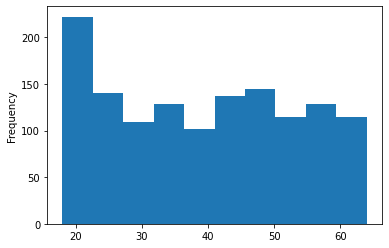

In [48]:
X['age'].plot(kind='hist')

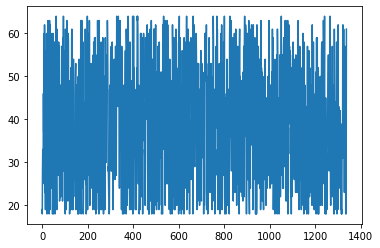

In [51]:
X['age'].plot(kind='line')

# Model

In [57]:
X = tf.constant([3,6,9,12,15,18,21,24,27])
Y = tf.constant([5,10,15,20,25,30,35,40,45])

In [58]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                       tf.keras.layers.Dense(10),
                       tf.keras.layers.Dense(1)
])

model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_1.fit(tf.expand_dims(X,axis=1),Y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 308ms/step - loss: 19.4279 - mae: 19.4279
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 12.2555 - mae: 12.2555
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 4.2586 - mae: 4.2586
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 5.2440 - mae: 5.2440
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 5.1846 - mae: 5.1846
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 3.8938 - mae: 3.8938
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 6.0693 - mae: 6.0693
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 2.6039 - mae: 2.6039
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9144 - mae: 6.9144
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 1.3716 - mae: 1.3716
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 7

# Model 2

In [59]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['mae']
)

model_2.fit(tf.expand_dims(X,axis=1), Y, epochs=500)


Epoch 1/500
1/1 [==============================] - 0s 368ms/step - loss: 21.8256 - mae: 21.8256
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 0.4776 - mae: 0.4776
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 28.5885 - mae: 28.5885
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 21.2262 - mae: 21.2262
Epoch 5/500
1/1 [==============================] - 0s 7ms/step - loss: 6.9262 - mae: 6.9262
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 6.9272 - mae: 6.9272
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 12.4723 - mae: 12.4723
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 14.3224 - mae: 14.3224
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 14.1163 - mae: 14.1163
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 12.3492 - mae: 12.3492
Epoch 11/500
1/1 [==============================] - 0s 7ms/ste

In [60]:
model_2.evaluate(X,Y)

1/1 [==============================] - 0s 99ms/step - loss: 0.4827 - mae: 0.4827


[0.48271095752716064, 0.48271095752716064]

In [61]:
model_1.evaluate(X,Y)


1/1 [==============================] - 0s 104ms/step - loss: 4.4662 - mae: 4.4662


[4.466175556182861, 4.466175556182861]

In [62]:
model_2.evaluate(X,Y)

1/1 [==============================] - 0s 22ms/step - loss: 0.4827 - mae: 0.4827


[0.48271095752716064, 0.48271095752716064]

In [63]:
X,Y

(<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24, 27], dtype=int32)>,
 <tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int32)>)

In [64]:
model_1.predict([30])

array([[58.80102]], dtype=float32)

In [65]:
model_2.predict([30])

array([[49.02361]], dtype=float32)

In [67]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [68]:
Y = X+10

In [69]:
X_train = X[:40]
X_test = X[40:]
Y_train = Y[:40]
Y_test = Y[40:]

In [71]:
len(X), len(X_train), len(X_test), len(Y_train), len(Y_test)

(50, 40, 10, 40, 10)

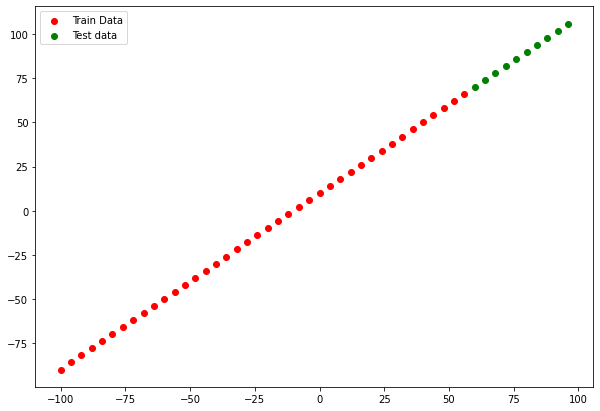

In [73]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,Y_train, color='red', label='Train Data')
plt.scatter(X_test, Y_test,color='green', label='Test data')
plt.legend()
plt.show()

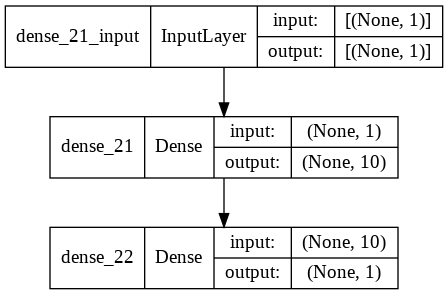

In [75]:
from tensorflow.keras.utils import plot_model
plot_model(model=model_1, show_shapes=True)

In [82]:
Y_pred = model_1.predict(X_test)

In [83]:
Y_pred_squeeze=  tf.squeeze(Y_pred)

In [80]:
def plot_predictions(
    train_data = X_train,
    train_label = Y_train,
    test_data = X_test,
    test_label = Y_test,
    predictions = X_test):
  
  plt.scatter(X_train,Y_train, color='red', label='The Train Values')
  plt.scatter(X_test, Y_test, color='green', label='The Test Values')
  plt.scatter(predictions, test_data, color='brown', label='Prediction with Test Data')
  plt.legend()
  plt.title("Train and test Values")

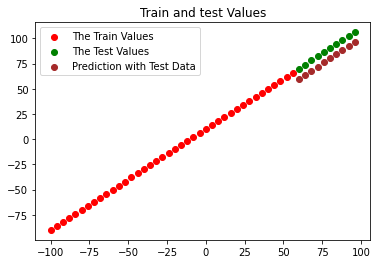

In [81]:
plot_predictions();

In [84]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=Y_test, y_pred=Y_pred_squeeze)

In [85]:
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true= Y_test, y_pred=Y_pred_squeeze)

In [86]:
mae(Y_test, Y_pred_squeeze)

<tf.Tensor: shape=(), dtype=float32, numpy=64.672516>

# Modelling Experiments

# Model 1

In [120]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=['mse']
)

model_1.fit(tf.expand_dims(X_train,axis=1),Y_train,epochs=5)

Epoch 1/5
2/2 [==============================] - 0s 6ms/step - loss: 15.9024 - mse: 343.1160
Epoch 2/5
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mse: 161.7596
Epoch 3/5
2/2 [==============================] - 0s 5ms/step - loss: 11.1074 - mse: 162.4521
Epoch 4/5
2/2 [==============================] - 0s 6ms/step - loss: 9.2991 - mse: 134.4795
Epoch 5/5
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mse: 123.8306


In [121]:
model_1.evaluate(X,Y)

2/2 [==============================] - 0s 4ms/step - loss: 9.9157 - mse: 98.6512


[9.915743827819824, 98.65119171142578]

# Model 2

In [122]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=['mse']
)
model_2.fit(tf.expand_dims(X_train,axis=1), Y_train, epochs=100)



Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mse: 1334.8956
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [==========================

In [123]:
model_2.evaluate(X,Y)

2/2 [==============================] - 0s 7ms/step - loss: 9.8363 - mse: 145.1648


[9.83630657196045, 145.1648406982422]

# Model 3

In [124]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['mse']
)

model_3.fit(tf.expand_dims(X_train,axis=1),Y_train,epochs=500)


Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 62.7447 - mse: 18479.5527
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 67.8434 - mse: 9778.3340
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 94.0068 - mse: 14766.0107
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 62.8602 - mse: 5986.2749
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 15.4065 - mse: 373.3583
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 32.5737 - mse: 1488.5314
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 9.1355 - mse: 101.7203
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 9.0973 - mse: 109.8091
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 23.2050 - mse: 748.9720
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 24.5367 - mse: 829.9402
Epoch 11/500
2/2 [==========================

In [125]:
model_3.evaluate(X,Y)

2/2 [==============================] - 0s 7ms/step - loss: 1.3171 - mse: 2.3710


[1.3171310424804688, 2.370983362197876]

In [126]:
model_2.evaluate(X,Y)

2/2 [==============================] - 0s 6ms/step - loss: 9.8363 - mse: 145.1648


[9.83630657196045, 145.1648406982422]

In [127]:
model_1.evaluate(X,Y)

2/2 [==============================] - 0s 5ms/step - loss: 9.9157 - mse: 98.6512


[9.915743827819824, 98.65119171142578]

In [128]:
y_pred_1 = model_1.predict(X_test)

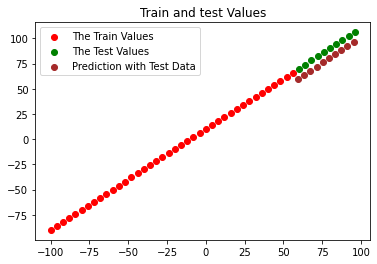

In [129]:
plot_predictions(predictions=y_pred_1)

In [130]:
mae_1 = mae(Y_test, y_pred_1)

In [131]:
mse_1 = mse(Y_test, y_pred_1)

In [132]:
y_pred_2 = model_2.predict(X_test)

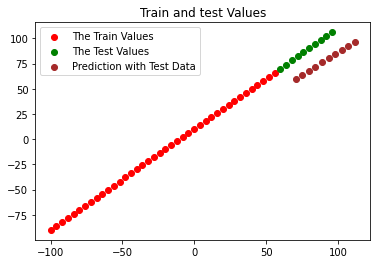

In [133]:
plot_predictions(predictions=y_pred_2)

In [134]:
mae_2 = mae(Y_test, y_pred_2)

In [135]:
mse_2 = mse(Y_test, y_pred_2)

In [136]:
y_pred_3 = model_3.predict(X_test)


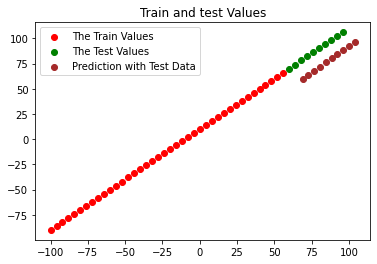

In [137]:
plot_predictions(predictions=y_pred_3)

In [138]:
mae_3 = mae(Y_test, y_pred_3)

In [139]:
mse_3 = mse(Y_test, y_pred_3)

In [140]:
model_results = [
                 ['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()],
]

In [141]:
all_results = pd.DataFrame(model_results,columns=['model','mae','mse'])
all_results

,model,mae,mse
0,model_1,64.672516,4303.087402
1,model_2,64.672516,4303.087402
2,model_3,64.672516,4303.087402
